# Computational Intelligence: Gebärdenspracherkennung mit Computer Vision
Milan Daniel Larsen


In [9]:
!pip install tensorflow opencv-python mediapipe sklearn matplotlib
# Installation der benötigten packete

In [10]:
!pip install -q git+https://github.com/tensorflow/docs

Importierung der benutzten libs:

In [77]:
import cv2 
import numpy as np
import os
from matplotlib import pyplot as plt
import matplotlib.image
import time
import mediapipe as mp
import itertools
import pandas as pd
import tensorflow as tf

import tqdm
import random
import pathlib
import json

import collections
from IPython.display import Video
from IPython.display import Image
from IPython.display import YouTubeVideo
# Some modules to display an animation using imageio.
import imageio
from IPython import display
from urllib import request

from tensorflow_docs.vis import embed

# 1. Detektierung der Landmarks mit MediaPipe

MediaPipe ist ein Framework von Google für auf visionärer KI basierende Anwendungen und ermöglicht es uns, Bewegungen der Hände und des Körpers einfach zu extrahieren. Dies erleichtert die korrekte Erkennung von Gesten im Vergleich zu ausschließlich durch ein CNN (Convolutional Neural Network). Dadurch reduziert sich auch die Datenmenge, die wir für eine ausreichend genaue Bestimmung der Gesten benötigen.

`mp_holistic` wird hier zur Detektion verwendet, während `mp_drawing` zum Zeichnen der Landmarks verwendet wird.

In [2]:
mp_holistic = mp.solutions.holistic #Holistic model
mp_drawing = mp.solutions.drawing_utils # drawing utilities

Es wird eine Funktion "mediapip_detection" definiert. Diese verarbeitet ein Bild mit hilfe der MediaPipe und dem vorher definierten "holistic" Model.
Das holistische Model ermöglicht es uns Haltung, Gesicht und Hände zu anaylsieren und zu erkennen.



In [3]:
def mediapipe_detection(image,model):
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB) # BGR zu RGB
    image.flags.writeable = False # Bild nicht mehr beschreibar
    results = model.process(image) #  MediaPipe auswetung
    image.flags.writeable = True # Bild wieder beschreibar
    image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR) # RBG zu BGR
    return image, results # Bild und Ergebnis Zurückgeben

Anschließend wird die Funktion "draw_landmarks" implenentiert, die für die Darstellung der landmarks benutzt wird.
Landmarks werden die verschiedenen Ankerpunkte des trackings genannt.
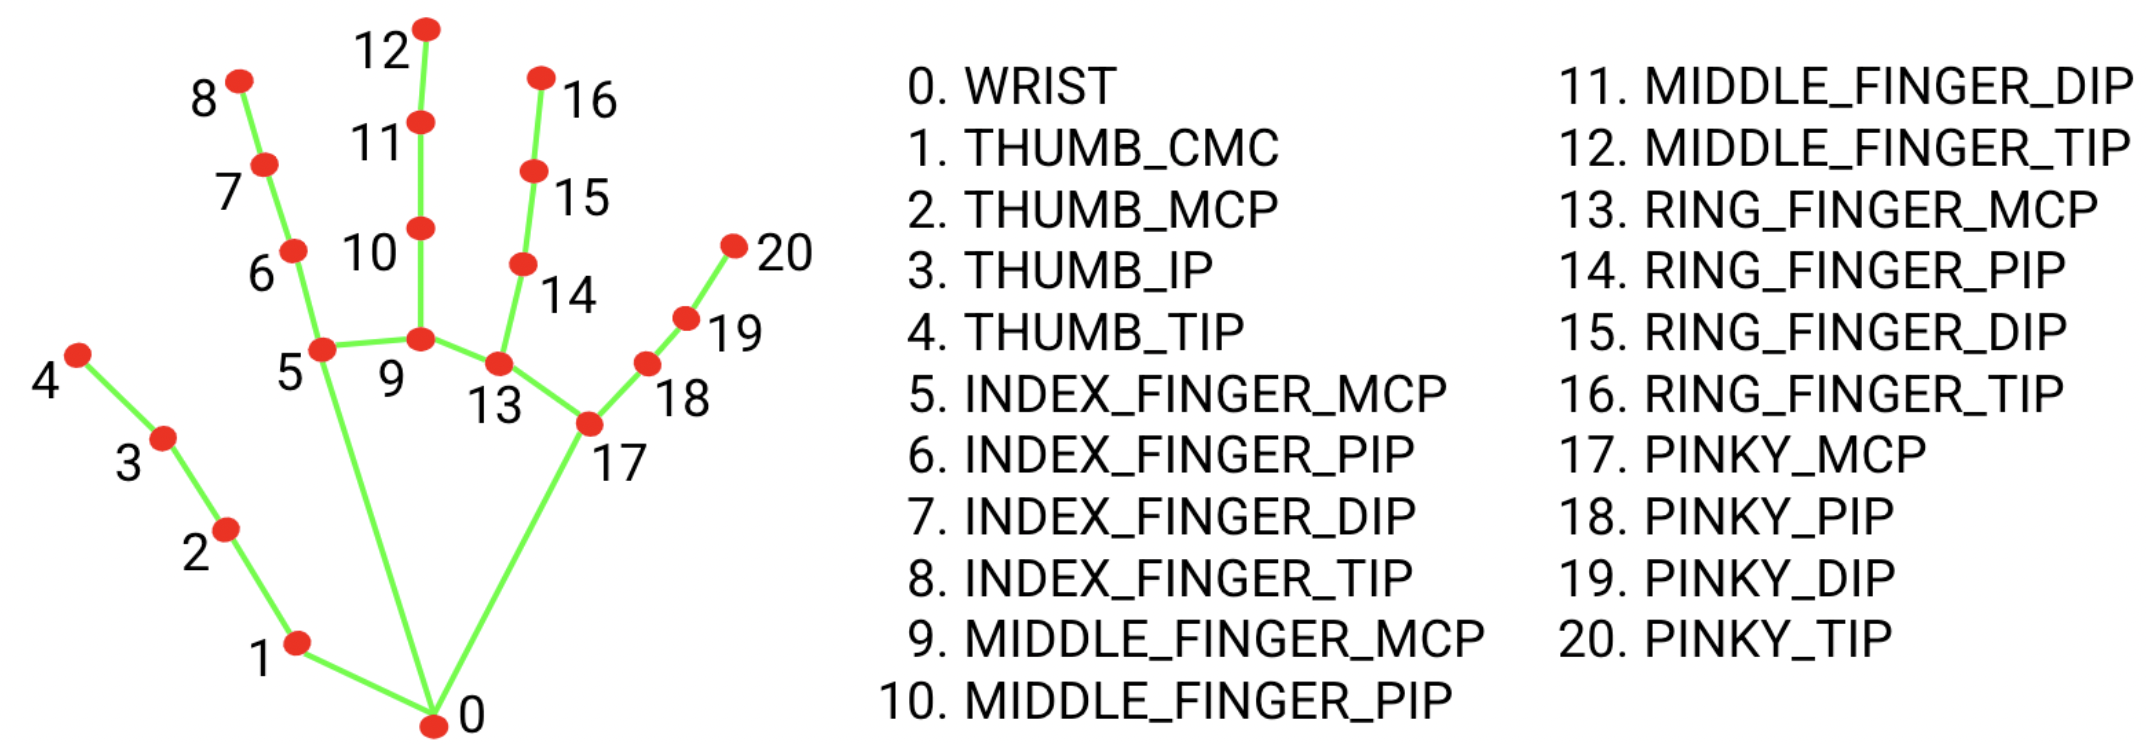

Für die Hand stehen 21 Landmarks zu Verfügung. 




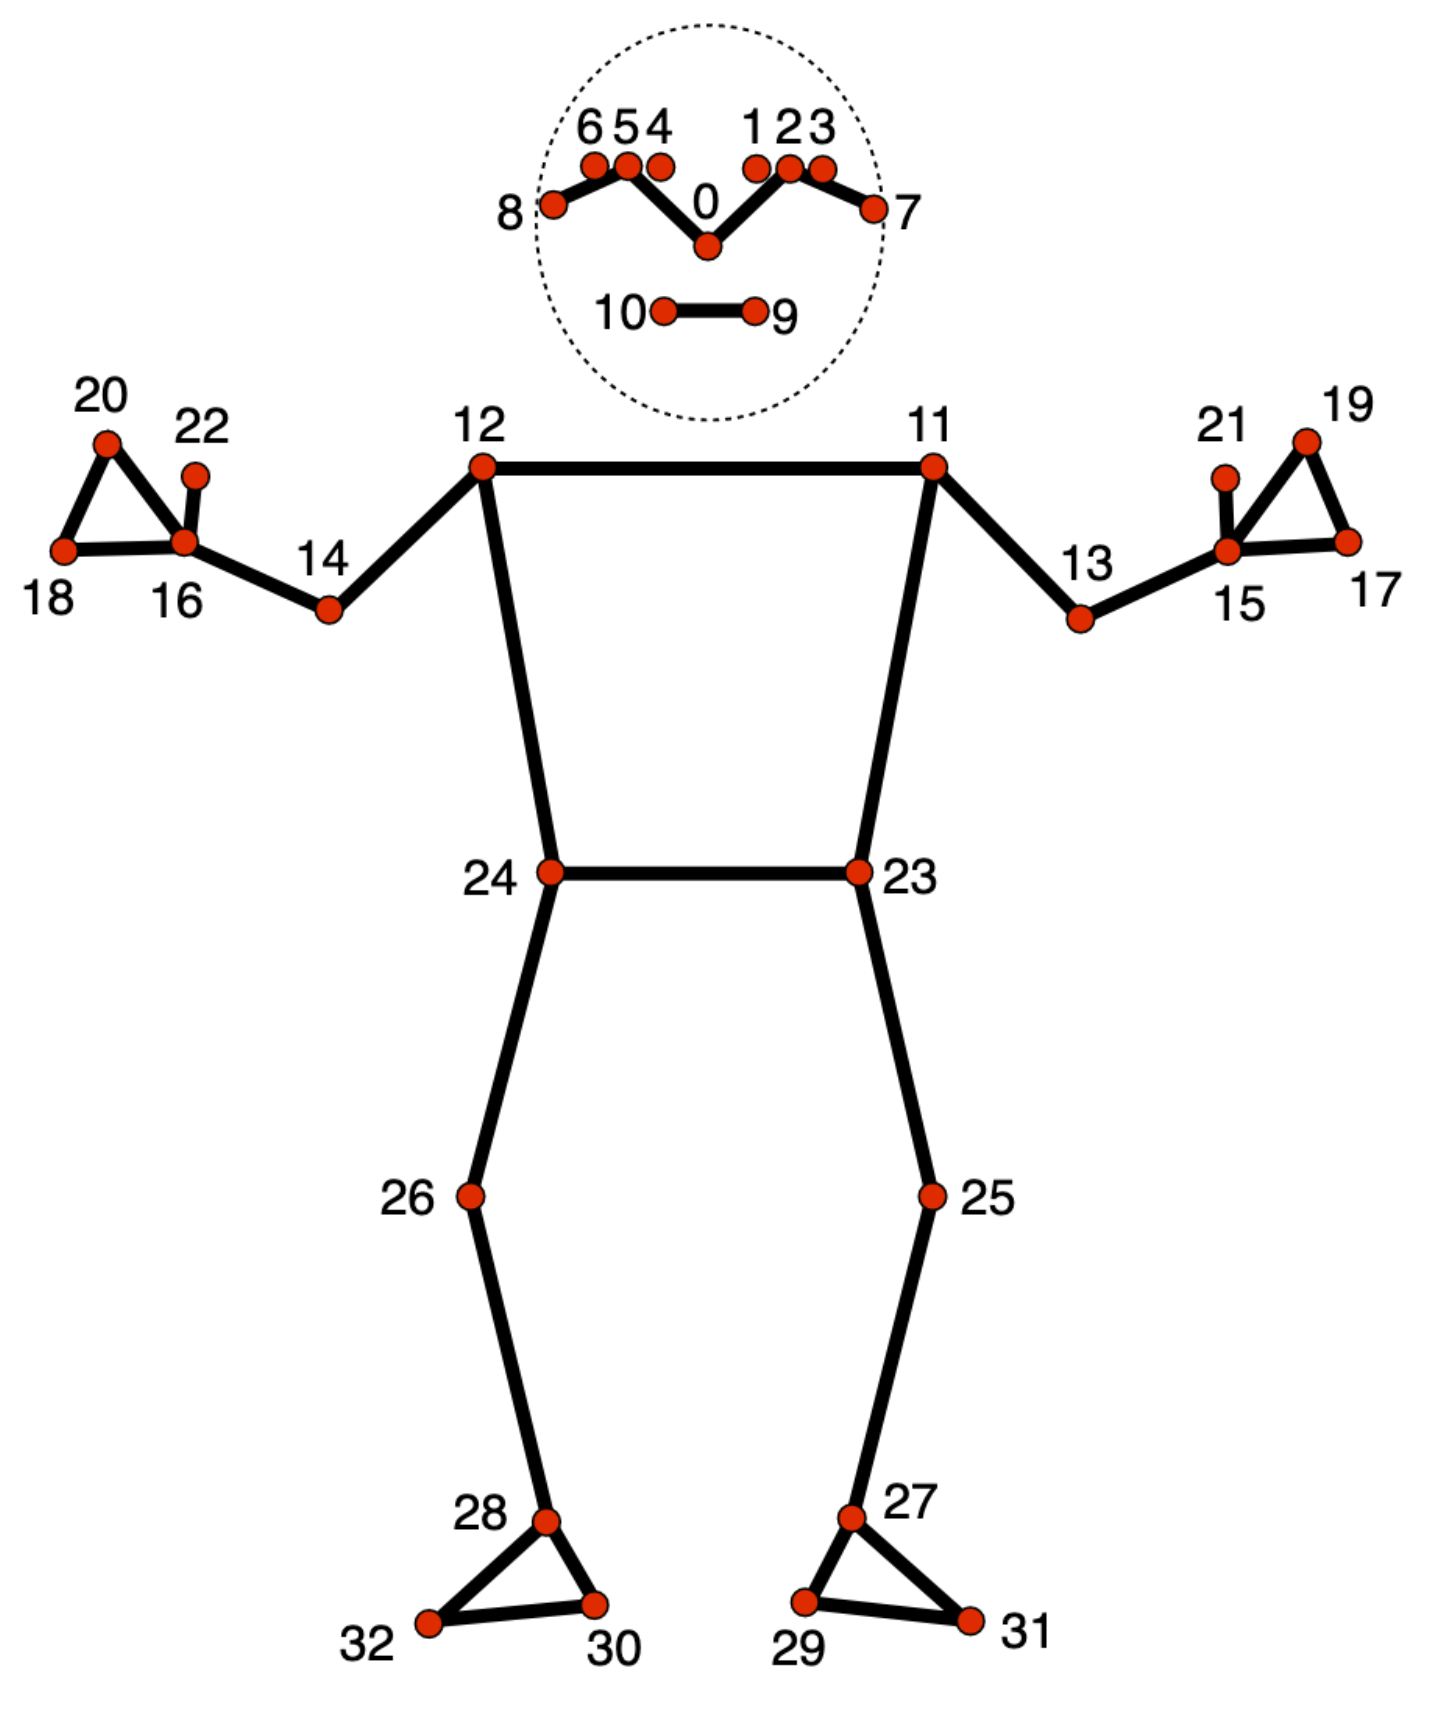
Für die pose stehen 33 landmarks zur verfügung

Über die Funktionen `draw_landmarks` und `draw_styled_landmarks` werden die Farben und Größen der Punkte und Linien festgelegt. 

In [4]:
def draw_landmarks(image,results):
    mp_drawing.draw_landmarks(image,results.face_landmarks,mp_holistic.FACEMESH_TESSELATION,
                             mp_drawing.DrawingSpec(color=(0,0,255),thickness=1,circle_radius=1), # Farbe der Punkte
                             mp_drawing.DrawingSpec(color=(250,206,135),thickness=1,circle_radius=4)) # Farbe des meshes
     # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
     # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             )                

In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(238,229,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [67]:
aufnahme =cv2.VideoCapture(1) # Webcam auswählen
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    while aufnahme.isOpened(): 

        # Lesen der Webcam
        ret,frame =aufnahme.read()
        
        # Detektion
        image, results = mediapipe_detection(frame,holistic)
        myhand=results.left_hand_landmarks
        
        print(myhand)
        # Landmarks zeichnen
        draw_landmarks(image,results)
                # Abspielen des feeds
       # cv2.resize(image, (1000, 600))
        cv2.imshow('Ausgabe',image)
        

        # Abbrechen des Feedes
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    aufnahme.release()
    cv2.destroyAllWindows()

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


Das Ergebnis wird in einem NumPy Array abgespeichert und enthält die Koordinaten x,y und z für jeden Landmark.

In [82]:
#len(results.left_hand_landmarks.landmark)
len(results.right_hand_landmark.landmark)

AttributeError: type object 'SolutionOutputs' has no attribute 'right_hand_landmark'

Die Anzahl der Landmarks pro Hand ist wie erwartet 21.

In [68]:
draw_landmarks(frame,results) # Landmarks auf image zeichnen

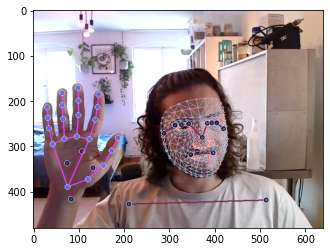

In [69]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)) #Ausgabe des Bildes

Folgendes Bild ist ein Test der Landmarks.

In [70]:
# Filename
filename = 'savedImage.jpg'
cv2.imwrite(filename, frame)

True

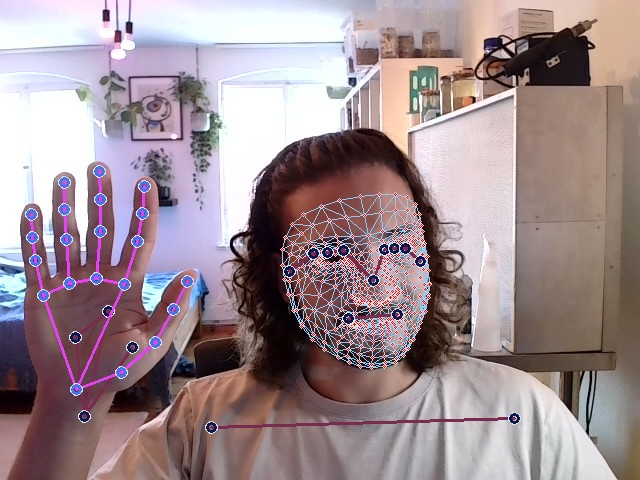

In [75]:
Image(filename)


Durch das gut funktionierende MediaPipe ist selbst bei schlechten Lichtverhältnissen, wie in dem Beispiel mein Zimmer, eine Extraktion  der Keypoints möglich.

In [10]:
results.pose_landmarks.landmark[0].visibility

0.9999575018882751

# 2. Extraktion und Speicherung der Landmarks

Im Folgendem Kapitel sollen nun die Landmark Kooardinaten aus dem Ergebnis extrahiert werden und anschließend in NP-Arrays gespecihert werden.

Dies wir zunächst an der "Pose" getestet.
Wir loopen dafür durch ``results.pose_landmarks.landmark `` und extrahieren für jede landmark ```res.x, res.y, res.z, res.visibility```

In [11]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [12]:
pose

[array([ 0.53385872,  0.52968985, -1.192837  ,  0.9999575 ]),
 array([ 0.55340081,  0.45651576, -1.10547423,  0.99991459]),
 array([ 0.56896085,  0.45550197, -1.1055907 ,  0.99988139]),
 array([ 0.58610928,  0.45542282, -1.10553682,  0.99987268]),
 array([ 0.49504381,  0.46195862, -1.10708833,  0.99992472]),
 array([ 0.47101212,  0.46425799, -1.10665762,  0.99992561]),
 array([ 0.45033947,  0.46645832, -1.10695338,  0.99994147]),
 array([ 0.60047549,  0.48409003, -0.56440294,  0.99986196]),
 array([ 0.41750446,  0.4925338 , -0.55984634,  0.99995476]),
 array([ 0.56473947,  0.59842235, -0.99808198,  0.9999525 ]),
 array([ 0.49051866,  0.60229516, -0.99860126,  0.99996829]),
 array([ 0.72958583,  0.82625324, -0.23239768,  0.99816126]),
 array([ 0.28123814,  0.80405438, -0.30442855,  0.99913251]),
 array([ 0.86861354,  1.27275646, -0.20759368,  0.40048259]),
 array([ 0.04847405,  1.09404993, -0.91518086,  0.94220632]),
 array([ 0.88611746,  1.61606753, -0.56676215,  0.24908507]),
 array([

In dem NP-Array sind nun die Koordinaten gespeichert und der test war erfolgreich.
Anschlließend wird der code noch refactored und auf die Restlichen landmarsk in "Face", "lh" für left hand und "rh".\
Ebenso muss abgefangen werden, dass das Array leer ist, wenn zb eine Hand nicht im Bild ist.
Dazu wird ein Null-Array verwendet sollte ein landmark nicht existieren.

In [13]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in  results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [14]:
pose.shape


(132,)

In [15]:


def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])




Anschließend wird eine Funktion erstellt die uns die Landmarks extrahiert und in einem array zurückgibt. 

# 3. Erstellung der Ordnerstruktur für Training und Testing

Um trainingsdaten aufzunehmen erstellen wir eine Ordnerstruktur, in dem die aufgezeichneten NP-Arrays abgespeichert werden.
Als Grundlage für das Training sollen je Geste 30 Videos erstellt werden. 
Jedes Video besteht aus 30 Frames.

Ebenso werden die Gesten definiert, die erkannt werden sollen. 
In diesem Beispiel wollen wir "hi", "thanks", "i love you" und "do nothing" erkennen.

In [16]:
# Speicherort
DATA_PATH = os.path.join('C://Users/milan/CI/Project/data_self/') 

#actions = np.array(['Doing other things', 'Drumming Fingers', 'No gesture', 'Pulling Hand In','Pulling Two Fingers In','Pushing Hand Away','Pushing Hand Away','Pushing Two Fingers Away','Rolling Hand Backward','Rolling Hand Forward','Shaking Hand','Sliding Two Fingers Down','Sliding Two Fingers Left','Sliding Two Fingers Right','Sliding Two Fingers Up','Stop Sign','Swiping Down','Swiping Left','Swiping Right','Swiping Up','Thumb Down','Thumb Up','Turning Hand Clockwise','Turning Hand Counterclockwise','Zooming In With Full Hand','Zooming In With Two Fingers','Zooming Out With Full Hand','Zooming Out With Two Fingers'])

# Gesten definieren
#actions = np.array(['hi', 'thanks', 'iloveyou','do nothing'])
actions = np.array(['hi', 'thanks', 'iloveyou','donothing'])

# Anzahl der Videos
no_sequences = 30

# Anzahl der Frames pro Video
sequence_length = 30

# Folder start
start_folder = 30

                    

In [17]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except Exception as error:
             print("An error occurred:", error) # Ausgabe des Fehlers, falls Ordnererstellung fehlschlägt

An error occurred: [WinError 183] Cannot create a file when that file already exists: 'C://Users/milan/CI/Project/data_self/hi\\0'
An error occurred: [WinError 183] Cannot create a file when that file already exists: 'C://Users/milan/CI/Project/data_self/hi\\1'
An error occurred: [WinError 183] Cannot create a file when that file already exists: 'C://Users/milan/CI/Project/data_self/hi\\2'
An error occurred: [WinError 183] Cannot create a file when that file already exists: 'C://Users/milan/CI/Project/data_self/hi\\3'
An error occurred: [WinError 183] Cannot create a file when that file already exists: 'C://Users/milan/CI/Project/data_self/hi\\4'
An error occurred: [WinError 183] Cannot create a file when that file already exists: 'C://Users/milan/CI/Project/data_self/hi\\5'
An error occurred: [WinError 183] Cannot create a file when that file already exists: 'C://Users/milan/CI/Project/data_self/hi\\6'
An error occurred: [WinError 183] Cannot create a file when that file already exist

# 4. Aufnahme der Videos und Landmark Detektion
Im folgendem Abschnitt werden eigene Daten in Form von kleine, 30 Frames langen Videos aufgenommen und über CV analysiert.
Mit der Media Pipe werden die Keypoints extrahiert.

In [18]:


cam_feed = cv2.VideoCapture(1)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cam_feed.read()

                # Landmarks Detektieren
                image, results = mediapipe_detection(frame, holistic)

                # Zeichnen der Landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'Start der Sequenz', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Ausgabe des Feedes
                    cv2.imshow('Ausgabe', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('Ausgabe', image)
                
                # Landmark/Keypoint Extraktion
                keypoints = extract_keypoints(results) # Extraktion der keypoints
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cam_feed.release()
    cv2.destroyAllWindows()

Im nachfolgenden Video wird die Aufnahme der Clips für unser Netzwerk demonstriert.
Für jede Aktion werden 30 Clips mit jeweils 30 Frames aufgezeichnet. Die jeweilige Aktion wird oben in der Leiste angezeigt, und vor jeder Aufnahme wird ein Text eingeblendet, der den Start der Aufnahme bestätigt.

In [79]:
YouTubeVideo('2RghZ2d_P9A ', width=800, height=300)

InvalidURL: URL can't contain control characters. '/vi/2RghZ2d_P9A /hqdefault.jpg' (found at least ' ')

# 5. Datenverarbeitung und Labels
Im Folgenden Kapitel werden nun die Daten, die gesammelt worden sind, weiter verarbeitet und ein Train/Test split erstellt.
Mit dem einen Datensatz wird dann das Neural Netzt trainiert und mit dem andern getestet.

In [19]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [20]:
label_map = {label:num for num, label in enumerate(actions)}


In [21]:


label_map



{'hi': 0, 'thanks': 1, 'iloveyou': 2, 'donothing': 3}

In [22]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [23]:
np.array(sequences).shape

(120, 30, 1662)

In [24]:


np.array(labels).shape



(120,)

In [25]:


X = np.array(sequences)



In [26]:


X.shape



(120, 30, 1662)

In [27]:


y = to_categorical(labels).astype(int)



In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [29]:


y_test.shape



(6, 4)

In [30]:


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard



In [31]:


log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)



In [32]:
actions.shape[0]

4

In [33]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [34]:
res = [.7, 0.2, 0.1]

In [35]:
actions[np.argmax(res)]

'hi'

In [36]:


model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])



In [37]:
model.fit(X_train, y_train, epochs=1000, callbacks=[tb_callback])

Epoch 1/1000
4/4 [==============================] - 3s 48ms/step - loss: 3.5418 - categorical_accuracy: 0.2632
Epoch 2/1000
4/4 [==============================] - 0s 48ms/step - loss: 1.6393 - categorical_accuracy: 0.2632
Epoch 3/1000
4/4 [==============================] - 0s 49ms/step - loss: 1.3585 - categorical_accuracy: 0.3772
Epoch 4/1000
4/4 [==============================] - 0s 47ms/step - loss: 1.3819 - categorical_accuracy: 0.3684
Epoch 5/1000
4/4 [==============================] - 0s 44ms/step - loss: 1.3410 - categorical_accuracy: 0.2456
Epoch 6/1000
4/4 [==============================] - 0s 46ms/step - loss: 1.3128 - categorical_accuracy: 0.5088
Epoch 7/1000
4/4 [==============================] - 0s 44ms/step - loss: 1.3301 - categorical_accuracy: 0.3772
Epoch 8/1000
4/4 [==============================] - 0s 45ms/step - loss: 1.0798 - categorical_accuracy: 0.5088
Epoch 9/1000
4/4 [==============================] - 0s 45ms/step - loss: 0.8341 - categorical_accuracy: 0.5965
E

4/4 [==============================] - 0s 49ms/step - loss: 6.8162e-04 - categorical_accuracy: 1.0000
Epoch 75/1000
4/4 [==============================] - 0s 52ms/step - loss: 5.0911e-04 - categorical_accuracy: 1.0000
Epoch 76/1000
4/4 [==============================] - 0s 52ms/step - loss: 4.4118e-04 - categorical_accuracy: 1.0000
Epoch 77/1000
4/4 [==============================] - 0s 49ms/step - loss: 3.4003e-04 - categorical_accuracy: 1.0000
Epoch 78/1000
4/4 [==============================] - 0s 49ms/step - loss: 2.7821e-04 - categorical_accuracy: 1.0000
Epoch 79/1000
4/4 [==============================] - 0s 50ms/step - loss: 2.4181e-04 - categorical_accuracy: 1.0000
Epoch 80/1000
4/4 [==============================] - 0s 49ms/step - loss: 2.1065e-04 - categorical_accuracy: 1.0000
Epoch 81/1000
4/4 [==============================] - 0s 51ms/step - loss: 1.9584e-04 - categorical_accuracy: 1.0000
Epoch 82/1000
4/4 [==============================] - 0s 50ms/step - loss: 1.7709e-04 -

4/4 [==============================] - 0s 51ms/step - loss: 2.3135e-05 - categorical_accuracy: 1.0000
Epoch 145/1000
4/4 [==============================] - 0s 52ms/step - loss: 2.2669e-05 - categorical_accuracy: 1.0000
Epoch 146/1000
4/4 [==============================] - 0s 50ms/step - loss: 2.2312e-05 - categorical_accuracy: 1.0000
Epoch 147/1000
4/4 [==============================] - 0s 51ms/step - loss: 2.1884e-05 - categorical_accuracy: 1.0000
Epoch 148/1000
4/4 [==============================] - 0s 53ms/step - loss: 2.1745e-05 - categorical_accuracy: 1.0000
Epoch 149/1000
4/4 [==============================] - 0s 49ms/step - loss: 2.1626e-05 - categorical_accuracy: 1.0000
Epoch 150/1000
4/4 [==============================] - 0s 53ms/step - loss: 2.0636e-05 - categorical_accuracy: 1.0000
Epoch 151/1000
4/4 [==============================] - 0s 54ms/step - loss: 2.0487e-05 - categorical_accuracy: 1.0000
Epoch 152/1000
4/4 [==============================] - 0s 53ms/step - loss: 2.05

4/4 [==============================] - 0s 51ms/step - loss: 8.3622e-06 - categorical_accuracy: 1.0000
Epoch 215/1000
4/4 [==============================] - 0s 54ms/step - loss: 8.3539e-06 - categorical_accuracy: 1.0000
Epoch 216/1000
4/4 [==============================] - 0s 52ms/step - loss: 8.2263e-06 - categorical_accuracy: 1.0000
Epoch 217/1000
4/4 [==============================] - 0s 53ms/step - loss: 8.0925e-06 - categorical_accuracy: 1.0000
Epoch 218/1000
4/4 [==============================] - 0s 55ms/step - loss: 7.8835e-06 - categorical_accuracy: 1.0000
Epoch 219/1000
4/4 [==============================] - 0s 54ms/step - loss: 7.8824e-06 - categorical_accuracy: 1.0000
Epoch 220/1000
4/4 [==============================] - 0s 53ms/step - loss: 7.8459e-06 - categorical_accuracy: 1.0000
Epoch 221/1000
4/4 [==============================] - 0s 54ms/step - loss: 7.7946e-06 - categorical_accuracy: 1.0000
Epoch 222/1000
4/4 [==============================] - 0s 56ms/step - loss: 7.68

4/4 [==============================] - 0s 52ms/step - loss: 4.2734e-06 - categorical_accuracy: 1.0000
Epoch 285/1000
4/4 [==============================] - 0s 50ms/step - loss: 4.2452e-06 - categorical_accuracy: 1.0000
Epoch 286/1000
4/4 [==============================] - 0s 51ms/step - loss: 4.2285e-06 - categorical_accuracy: 1.0000
Epoch 287/1000
4/4 [==============================] - 0s 55ms/step - loss: 4.1574e-06 - categorical_accuracy: 1.0000
Epoch 288/1000
4/4 [==============================] - 0s 51ms/step - loss: 4.1741e-06 - categorical_accuracy: 1.0000
Epoch 289/1000
4/4 [==============================] - 0s 52ms/step - loss: 4.1281e-06 - categorical_accuracy: 1.0000
Epoch 290/1000
4/4 [==============================] - 0s 53ms/step - loss: 4.0246e-06 - categorical_accuracy: 1.0000
Epoch 291/1000
4/4 [==============================] - 0s 53ms/step - loss: 4.0110e-06 - categorical_accuracy: 1.0000
Epoch 292/1000
4/4 [==============================] - 0s 54ms/step - loss: 3.99

4/4 [==============================] - 0s 54ms/step - loss: 2.3977e-06 - categorical_accuracy: 1.0000
Epoch 355/1000
4/4 [==============================] - 0s 55ms/step - loss: 2.3757e-06 - categorical_accuracy: 1.0000
Epoch 356/1000
4/4 [==============================] - 0s 54ms/step - loss: 2.3454e-06 - categorical_accuracy: 1.0000
Epoch 357/1000
4/4 [==============================] - 0s 54ms/step - loss: 2.3423e-06 - categorical_accuracy: 1.0000
Epoch 358/1000
4/4 [==============================] - 0s 54ms/step - loss: 2.2973e-06 - categorical_accuracy: 1.0000
Epoch 359/1000
4/4 [==============================] - 0s 55ms/step - loss: 2.2910e-06 - categorical_accuracy: 1.0000
Epoch 360/1000
4/4 [==============================] - 0s 55ms/step - loss: 2.2889e-06 - categorical_accuracy: 1.0000
Epoch 361/1000
4/4 [==============================] - 0s 53ms/step - loss: 2.2806e-06 - categorical_accuracy: 1.0000
Epoch 362/1000
4/4 [==============================] - 0s 55ms/step - loss: 2.26

4/4 [==============================] - 0s 54ms/step - loss: 1.4650e-06 - categorical_accuracy: 1.0000
Epoch 425/1000
4/4 [==============================] - 0s 56ms/step - loss: 1.4545e-06 - categorical_accuracy: 1.0000
Epoch 426/1000
4/4 [==============================] - 0s 55ms/step - loss: 1.4472e-06 - categorical_accuracy: 1.0000
Epoch 427/1000
4/4 [==============================] - 0s 56ms/step - loss: 1.4388e-06 - categorical_accuracy: 1.0000
Epoch 428/1000
4/4 [==============================] - 0s 57ms/step - loss: 1.4399e-06 - categorical_accuracy: 1.0000
Epoch 429/1000
4/4 [==============================] - 0s 56ms/step - loss: 1.4263e-06 - categorical_accuracy: 1.0000
Epoch 430/1000
4/4 [==============================] - 0s 59ms/step - loss: 1.4127e-06 - categorical_accuracy: 1.0000
Epoch 431/1000
4/4 [==============================] - 0s 58ms/step - loss: 1.3991e-06 - categorical_accuracy: 1.0000
Epoch 432/1000
4/4 [==============================] - 0s 55ms/step - loss: 1.39

4/4 [==============================] - 0s 55ms/step - loss: 9.6098e-07 - categorical_accuracy: 1.0000
Epoch 495/1000
4/4 [==============================] - 0s 54ms/step - loss: 9.5888e-07 - categorical_accuracy: 1.0000
Epoch 496/1000
4/4 [==============================] - 0s 54ms/step - loss: 9.5052e-07 - categorical_accuracy: 1.0000
Epoch 497/1000
4/4 [==============================] - 0s 55ms/step - loss: 9.4843e-07 - categorical_accuracy: 1.0000
Epoch 498/1000
4/4 [==============================] - 0s 55ms/step - loss: 9.4215e-07 - categorical_accuracy: 1.0000
Epoch 499/1000
4/4 [==============================] - 0s 56ms/step - loss: 9.3797e-07 - categorical_accuracy: 1.0000
Epoch 500/1000
4/4 [==============================] - 0s 54ms/step - loss: 9.3379e-07 - categorical_accuracy: 1.0000
Epoch 501/1000
4/4 [==============================] - 0s 55ms/step - loss: 9.2647e-07 - categorical_accuracy: 1.0000
Epoch 502/1000
4/4 [==============================] - 0s 56ms/step - loss: 9.24

4/4 [==============================] - 0s 59ms/step - loss: 6.5983e-07 - categorical_accuracy: 1.0000
Epoch 565/1000
4/4 [==============================] - 0s 58ms/step - loss: 6.5564e-07 - categorical_accuracy: 1.0000
Epoch 566/1000
4/4 [==============================] - 0s 62ms/step - loss: 6.5146e-07 - categorical_accuracy: 1.0000
Epoch 567/1000
4/4 [==============================] - 0s 58ms/step - loss: 6.4623e-07 - categorical_accuracy: 1.0000
Epoch 568/1000
4/4 [==============================] - 0s 57ms/step - loss: 6.4309e-07 - categorical_accuracy: 1.0000
Epoch 569/1000
4/4 [==============================] - 0s 57ms/step - loss: 6.4309e-07 - categorical_accuracy: 1.0000
Epoch 570/1000
4/4 [==============================] - 0s 60ms/step - loss: 6.3787e-07 - categorical_accuracy: 1.0000
Epoch 571/1000
4/4 [==============================] - 0s 57ms/step - loss: 6.3577e-07 - categorical_accuracy: 1.0000
Epoch 572/1000
4/4 [==============================] - 0s 58ms/step - loss: 6.28

4/4 [==============================] - 0s 61ms/step - loss: 4.5906e-07 - categorical_accuracy: 1.0000
Epoch 635/1000
4/4 [==============================] - 0s 61ms/step - loss: 4.5487e-07 - categorical_accuracy: 1.0000
Epoch 636/1000
4/4 [==============================] - 0s 56ms/step - loss: 4.5383e-07 - categorical_accuracy: 1.0000
Epoch 637/1000
4/4 [==============================] - 0s 56ms/step - loss: 4.5069e-07 - categorical_accuracy: 1.0000
Epoch 638/1000
4/4 [==============================] - 0s 58ms/step - loss: 4.4651e-07 - categorical_accuracy: 1.0000
Epoch 639/1000
4/4 [==============================] - 0s 55ms/step - loss: 4.4651e-07 - categorical_accuracy: 1.0000
Epoch 640/1000
4/4 [==============================] - 0s 55ms/step - loss: 4.4442e-07 - categorical_accuracy: 1.0000
Epoch 641/1000
4/4 [==============================] - 0s 55ms/step - loss: 4.4128e-07 - categorical_accuracy: 1.0000
Epoch 642/1000
4/4 [==============================] - 0s 56ms/step - loss: 4.39

4/4 [==============================] - 0s 57ms/step - loss: 3.2521e-07 - categorical_accuracy: 1.0000
Epoch 705/1000
4/4 [==============================] - 0s 62ms/step - loss: 3.2207e-07 - categorical_accuracy: 1.0000
Epoch 706/1000
4/4 [==============================] - 0s 56ms/step - loss: 3.1998e-07 - categorical_accuracy: 1.0000
Epoch 707/1000
4/4 [==============================] - 0s 61ms/step - loss: 3.1998e-07 - categorical_accuracy: 1.0000
Epoch 708/1000
4/4 [==============================] - 0s 61ms/step - loss: 3.1789e-07 - categorical_accuracy: 1.0000
Epoch 709/1000
4/4 [==============================] - 0s 61ms/step - loss: 3.1580e-07 - categorical_accuracy: 1.0000
Epoch 710/1000
4/4 [==============================] - 0s 59ms/step - loss: 3.1371e-07 - categorical_accuracy: 1.0000
Epoch 711/1000
4/4 [==============================] - 0s 59ms/step - loss: 3.1371e-07 - categorical_accuracy: 1.0000
Epoch 712/1000
4/4 [==============================] - 0s 61ms/step - loss: 3.10

4/4 [==============================] - 0s 52ms/step - loss: 2.3737e-07 - categorical_accuracy: 1.0000
Epoch 775/1000
4/4 [==============================] - 0s 52ms/step - loss: 2.3737e-07 - categorical_accuracy: 1.0000
Epoch 776/1000
4/4 [==============================] - 0s 52ms/step - loss: 2.3319e-07 - categorical_accuracy: 1.0000
Epoch 777/1000
4/4 [==============================] - 0s 52ms/step - loss: 2.3110e-07 - categorical_accuracy: 1.0000
Epoch 778/1000
4/4 [==============================] - 0s 52ms/step - loss: 2.3214e-07 - categorical_accuracy: 1.0000
Epoch 779/1000
4/4 [==============================] - 0s 52ms/step - loss: 2.3005e-07 - categorical_accuracy: 1.0000
Epoch 780/1000
4/4 [==============================] - 0s 52ms/step - loss: 2.3005e-07 - categorical_accuracy: 1.0000
Epoch 781/1000
4/4 [==============================] - 0s 55ms/step - loss: 2.2796e-07 - categorical_accuracy: 1.0000
Epoch 782/1000
4/4 [==============================] - 0s 53ms/step - loss: 2.27

4/4 [==============================] - 0s 55ms/step - loss: 1.7672e-07 - categorical_accuracy: 1.0000
Epoch 845/1000
4/4 [==============================] - 0s 54ms/step - loss: 1.7568e-07 - categorical_accuracy: 1.0000
Epoch 846/1000
4/4 [==============================] - 0s 55ms/step - loss: 1.7672e-07 - categorical_accuracy: 1.0000
Epoch 847/1000
4/4 [==============================] - 0s 53ms/step - loss: 1.7463e-07 - categorical_accuracy: 1.0000
Epoch 848/1000
4/4 [==============================] - 0s 52ms/step - loss: 1.7358e-07 - categorical_accuracy: 1.0000
Epoch 849/1000
4/4 [==============================] - 0s 54ms/step - loss: 1.7254e-07 - categorical_accuracy: 1.0000
Epoch 850/1000
4/4 [==============================] - 0s 52ms/step - loss: 1.7358e-07 - categorical_accuracy: 1.0000
Epoch 851/1000
4/4 [==============================] - 0s 52ms/step - loss: 1.7358e-07 - categorical_accuracy: 1.0000
Epoch 852/1000
4/4 [==============================] - 0s 52ms/step - loss: 1.73

4/4 [==============================] - 0s 52ms/step - loss: 1.3594e-07 - categorical_accuracy: 1.0000
Epoch 915/1000
4/4 [==============================] - 0s 53ms/step - loss: 1.3489e-07 - categorical_accuracy: 1.0000
Epoch 916/1000
4/4 [==============================] - 0s 52ms/step - loss: 1.3385e-07 - categorical_accuracy: 1.0000
Epoch 917/1000
4/4 [==============================] - 0s 52ms/step - loss: 1.3385e-07 - categorical_accuracy: 1.0000
Epoch 918/1000
4/4 [==============================] - 0s 52ms/step - loss: 1.3385e-07 - categorical_accuracy: 1.0000
Epoch 919/1000
4/4 [==============================] - 0s 52ms/step - loss: 1.3385e-07 - categorical_accuracy: 1.0000
Epoch 920/1000
4/4 [==============================] - 0s 54ms/step - loss: 1.3385e-07 - categorical_accuracy: 1.0000
Epoch 921/1000
4/4 [==============================] - 0s 53ms/step - loss: 1.3280e-07 - categorical_accuracy: 1.0000
Epoch 922/1000
4/4 [==============================] - 0s 53ms/step - loss: 1.32

4/4 [==============================] - 0s 55ms/step - loss: 1.0666e-07 - categorical_accuracy: 1.0000
Epoch 985/1000
4/4 [==============================] - 0s 54ms/step - loss: 1.0666e-07 - categorical_accuracy: 1.0000
Epoch 986/1000
4/4 [==============================] - 0s 55ms/step - loss: 1.0666e-07 - categorical_accuracy: 1.0000
Epoch 987/1000
4/4 [==============================] - 0s 55ms/step - loss: 1.0562e-07 - categorical_accuracy: 1.0000
Epoch 988/1000
4/4 [==============================] - 0s 53ms/step - loss: 1.0457e-07 - categorical_accuracy: 1.0000
Epoch 989/1000
4/4 [==============================] - 0s 52ms/step - loss: 1.0457e-07 - categorical_accuracy: 1.0000
Epoch 990/1000
4/4 [==============================] - 0s 54ms/step - loss: 1.0352e-07 - categorical_accuracy: 1.0000
Epoch 991/1000
4/4 [==============================] - 0s 53ms/step - loss: 1.0352e-07 - categorical_accuracy: 1.0000
Epoch 992/1000
4/4 [==============================] - 0s 51ms/step - loss: 1.03

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 4)                 132       
                                                                 
Total params: 596708 (2.28 MB)
Trainable params: 596708 

# Testen des Models

In [39]:
res = model.predict(X_test)

1/1 [==============================] - 0s 248ms/step


In [40]:


actions[np.argmax(res[2])]



'iloveyou'

In [41]:
actions[np.argmax(y_test[2])]

'iloveyou'

# Abspeichern des Models

In [42]:


model.save('action_27_09.keras')



In [111]:
del model


In [85]:
model.load_weights('action3_09.keras')

# Evaluation using Confusion Matrix and Accuracy

In [50]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
yhat = model.predict(X_test)
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()
multilabel_confusion_matrix(ytrue, yhat)


accuracy_score(ytrue, yhat)



1/1 [==============================] - 0s 19ms/step


1.0

In [52]:
colors = [(245,117,16), (117,245,16), (16,117,245),(16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

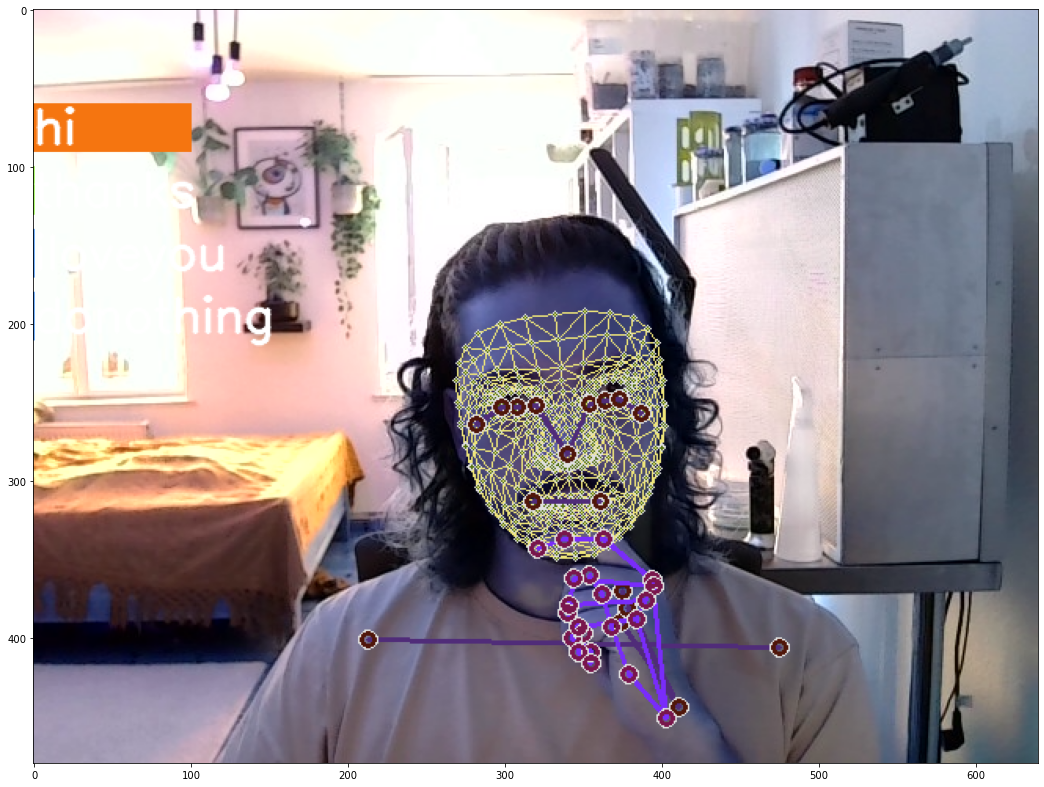

In [53]:


plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))



In [132]:
sequence.reverse()
len(sequence)

30

In [133]:
sequence.append('def')
sequence.reverse()
sequence[-30:]

[array([ 0.63878042,  0.77517802, -0.88039219, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.6389488 ,  0.7820217 , -1.17246222, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.63916171,  0.78697717, -1.17701769, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.63915646,  0.78820956, -1.13820517, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.63925838,  0.79024285, -1.17714214, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.63926214,  0.79140288, -1.18283582, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.63945973,  0.79249358, -1.16811299, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.63980472,  0.79241097, -1.18622291, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.63972896,  0.79333174, -1.15552175, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.63765407,  0.79366529, -1.14315689, ...,  0.        ,
         0.        ,  0.  

In [57]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.99

cap = cv2.VideoCapture(1)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
donothing
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
donothing
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
donothing
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
donothing
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
donothing
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
donothing
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
donothing
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
donothing
<class 'mediapipe.python.solution_base.SolutionO

<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
donothing
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
donothing
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
donothing
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
donothing
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
donothing
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
donothing
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
donothing
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
donothing
<class 'mediapipe.python.solution_base.SolutionO

iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
hi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
hi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/

1/1 [==============================] - 0s 16ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
thanks
<class 'media

1/1 [==============================] - 0s 18ms/step
donothing
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
donothing
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
donothing
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
donothing
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
donothing
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
donothing
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
donothing
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
donothing
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/s

Anschließend noch ein Video indem die Gestenerkennung getestet wrid.
Die Klassifizierung funktioniert relativ schnell und zuverlässig. 

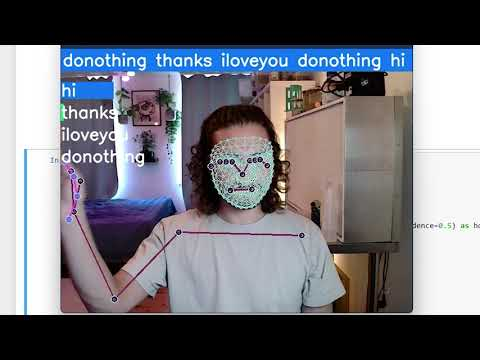

In [81]:
YouTubeVideo('1HhjBqrnUkE', width=800, height=300)

# Verwendung des "WLASL (World Level American Sign Language) Video" Datasets


Durch die Verwendung eines Dataset soll die Performance und Genauigkeit des Models verbessert werden. 
Das Dataset enthält insgesammt 12.000 Videos mit 2000 verschiedenen Handzeichen.

Zunächst werden die Videos in Frames zerlegt.


In [23]:


def format_frames(frame, output_size):
  """
    Pad and resize an image from a video.
    
    Args:
      frame: Image that needs to resized and padded. 
      output_size: Pixel size of the output frame image.

    Return:
      Formatted frame with padding of specified output size.
  """
  frame = tf.image.convert_image_dtype(frame, tf.float32)
  frame = tf.image.resize_with_pad(frame, *output_size)
  return frame
     


In [24]:
def frames_from_video_file(video_path, n_frames, output_size = (224,224), frame_step = 15):
  """
    Creates frames from each video file present for each category.

    Args:
      video_path: File path to the video.
      n_frames: Number of frames to be created per video file.
      output_size: Pixel size of the output frame image.

    Return:
      An NumPy array of frames in the shape of (n_frames, height, width, channels).
  """
  # Read each video frame by frame
  result = []
  src = cv2.VideoCapture(str(video_path))  

  video_length = src.get(cv2.CAP_PROP_FRAME_COUNT)

  need_length = 1 + (n_frames - 1) * frame_step

  if need_length > video_length:
    start = 0
  else:
    max_start = video_length - need_length
    start = random.randint(0, max_start + 1)

  src.set(cv2.CAP_PROP_POS_FRAMES, start)
  # ret is a boolean indicating whether read was successful, frame is the image itself
  ret, frame = src.read()
  result.append(format_frames(frame, output_size))

  for _ in range(n_frames - 1):
    for _ in range(frame_step):
      ret, frame = src.read()
    if ret:
      frame = format_frames(frame, output_size)
      result.append(frame)
    else:
      result.append(np.zeros_like(result[0]))
  src.release()
  result = np.array(result)[..., [2, 1, 0]]

  return result

In [9]:
video_path = os.path.join(r"C:\Users\milan\CI\Project\data_extern\vid_test",'00335.mp4')

In [11]:
os.path.exists(video_path)

True

In [7]:
video_path

'C:\\\\Users\\milan\\CI\\Project\\data_extern\\vid_test\\00335.mp4'

Video wiedergabe:

In [57]:
cap = cv2.VideoCapture(video_path)  

# Create a VideoCapture object and read from input file
# If the input is the camera, pass 0 instead of the video file name
 
# Check if camera opened successfully
if (cap.isOpened()== False): 
  print("Error opening video stream or file")
 
# Read until video is completed
while(cap.isOpened()):
  # Capture frame-by-frame
  ret, frame = cap.read()
  if ret == True:
     
    # Display the resulting frame
    cv2.imshow('Frame',frame)
 
    # Press Q on keyboard to  exit
    if cv2.waitKey(25) & 0xFF == ord('q'):
      break
 
  # Break the loop
  else: 
    break
 
# When everything done, release the video capture object
cap.release()
 
# Closes all the frames
cv2.destroyAllWindows()


In [34]:
Video(video_path,embed=True)

Video wiedergabe mit mediapipe:

In [21]:
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    cap = cv2.VideoCapture(video_path)  
    # Create a VideoCapture object and read from input file
    # If the input is the camera, pass 0 instead of the video file name
    # We need to set resolutions.
    # so, convert them from float to integer.
    frame_width = int(cap.get(3))
    frame_height = int(cap.get(4))
    size = (frame_width, frame_height)
    result = cv2.VideoWriter('detected.webM', 
                         cv2.VideoWriter_fourcc('V','P','8','0'),
                         10, size)
    
    # Check if camera opened successfully
    if (cap.isOpened()== False): 
      print("Error opening video stream or file")
 
    # Read until video is completed
    while(cap.isOpened()):
      # Capture frame-by-frame
      ret, frame = cap.read()
                # Detektion
     
      if ret == True:
        image, results = mediapipe_detection(frame,holistic)
        # Landmarks zeichnen
        draw_landmarks(image,results)
        # Display the resulting frame
        cv2.imshow('Frame',image)
        result.write(image)
        # Press Q on keyboard to  exit
        if cv2.waitKey(25) & 0xFF == ord('q'):
          break
 
      # Break the loop
      else: 
        break
 
    # When everything done, release the video capture object
    cap.release()
    result.release()
    # Closes all the frames
    cv2.destroyAllWindows()
    

In [22]:
Video("detected.webM",embed=True)


Nun sollen frames von den videos extrakiert weden und nach den Actions sortiert werden

In [38]:
video_path = os.path.join(r"C:\\Users\milan\CI\Project\data_extern\vid_test","00335.mp4")

resulution=(320,240)
n_frames=20
frame_step = 1
sample=frames_from_video_file(video_path,n_frames=30,frame_step = 1)

In [45]:
video_path


'C:\\\\Users\\milan\\CI\\Project\\data_extern\\vid_test\\00335.mp4'

In [155]:
sample.shape

(30, 224, 224, 3)

In [39]:
def to_gif(images):
  converted_images = np.clip(images * 255, 0, 255).astype(np.uint8)
  imageio.mimsave('./animation.gif', converted_images, fps=10)
  return embed.embed_file('./animation.gif')


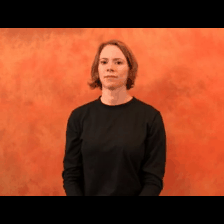

In [40]:
to_gif(sample)

In [32]:
for num, pic in enumerate(sample, start=1):
    fnam="picture"+str(num)+".png"
    matplotlib.image.imsave(fnam, pic)

In [ ]:
plt.imshow

In [8]:

with open('data_extern/WLASL_v0.3.json', 'r') as f:
  jsondata = json.load(f)


In [9]:
# print(str(jsondata['book']))


TypeError: list indices must be integers or slices, not str

  Created wheel for jupyter-contrib-nbextensions: filename=jupyter_contrib_nbextensions-0.7.0-py2.py3-none-any.whl size=23428786 sha256=9ee5016342a01ed4eb263450e87dd2d5ddc32185063fe0fb77c9500dcb579242
  Stored in directory: c:\users\milan\appdata\local\pip\cache\wheels\e7\99\91\7f24a075786a6760f3ac32ab5fa92e1d1a90e0d2cd8958adfd
  Created wheel for jupyter-contrib-core: filename=jupyter_contrib_core-0.4.2-py2.py3-none-any.whl size=17484 sha256=4530c37a5f0b87409169cb1f36940480c3d432aacda8b5e21ad9a1297a624627
  Stored in directory: c:\users\milan\appdata\local\pip\cache\wheels\57\9f\80\32c07b8a950a45f6cf8cd5980c22a27ce514c27b795250e497
Successfully built jupyter-contrib-nbextensions jupyter-contrib-core


Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok
Enabling notebook extension varInspector/main...
      - Validating: problems found:
        - require?  X varInspector/main
